# Imports

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [5]:
path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/02_Classification/ChurnData.csv"

In [6]:
df = pd.read_csv(path)

#Análsis básico

* Vistazo a DS (hace o no churn/se va de la empresa)

In [8]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


* Dimensiones

In [11]:
df.shape

(200, 28)

* Categorías en 'ed'

In [13]:
df.ed.unique()

array([5., 2., 1., 4., 3.])

* Veamos la data (nulos y tales)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

# Limpieza/preprocesamiento

* Hacemos tipo entero la columna objetivo

In [14]:
df['churn'] = df['churn'].astype('int')

# EDA

* Diagrama de Correlación descriptores vs target

<Axes: >

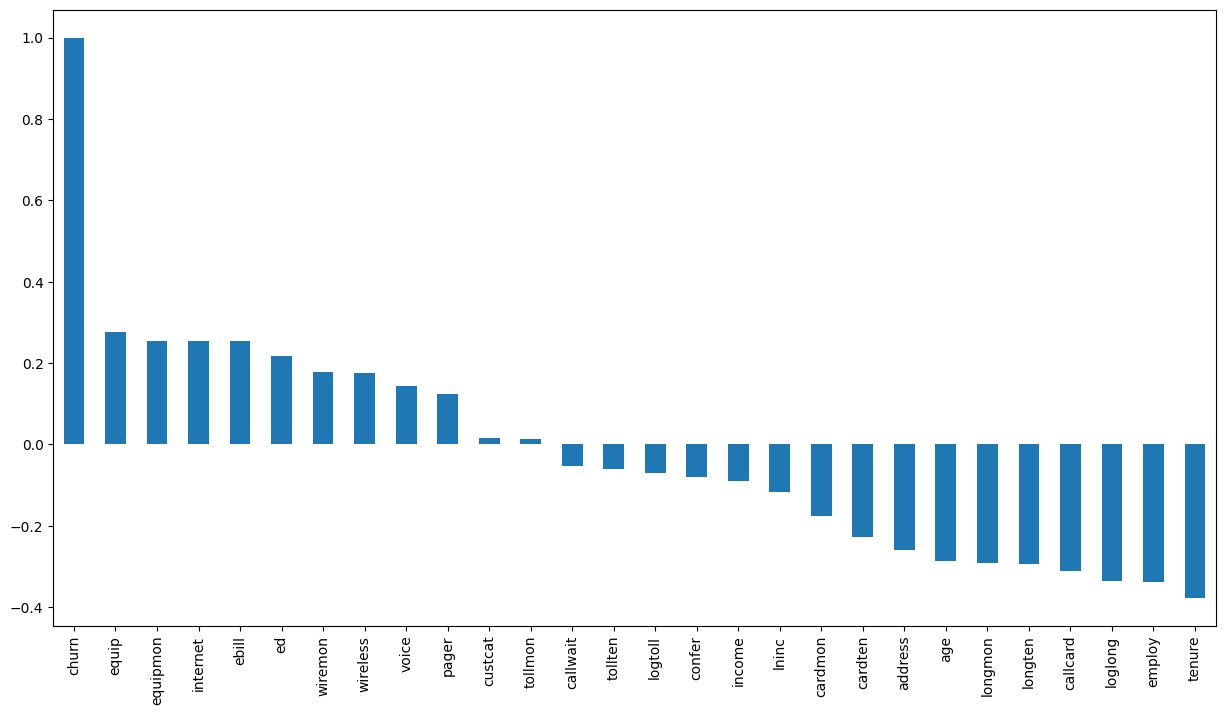

In [16]:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

* Análisis chimbita de 'ed', histograma bidimensional churn vs ed (i.e., colores cats)

In [22]:
import plotly.express as px

In [27]:
fig = px.histogram(df, x='churn', color= 'ed', barmode= 'group', title='<b> Churn distribution w.r.t Ed </b>')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Función de densidad entre idos y no vs el ingreso que ellos tienen (los idos mas clase media)

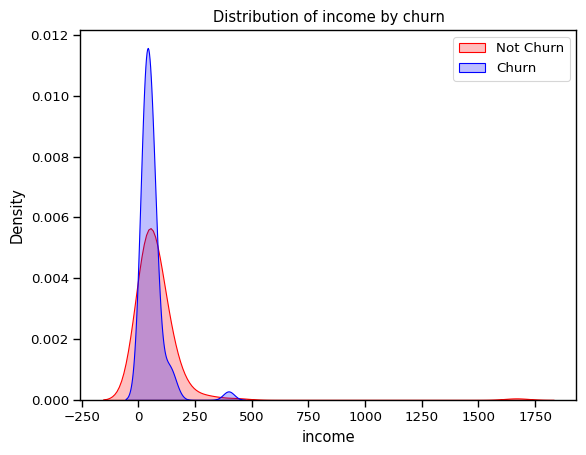

In [32]:
sns.set_context('paper', font_scale=1.1)

ax = sns.kdeplot(df.income[(df['churn'] == 0)], color = 'Red', fill=True);

ax = sns.kdeplot(df.income[(df['churn'] == 1)], ax=ax, color = 'Blue', fill=True);

ax.legend(['Not Churn', 'Churn'], loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('income');
ax.set_title('Distribution of income by churn');

* Diagrama de caja churn y Antiguedad (que era lo más correlacionado), comparación, vemos que a mayor tiempo, se quedan, las que se van son las máss nuevas 

In [35]:
fig = px.box(df, x='churn', y = 'tenure')

#upda yaxis properties
fig.update_yaxes(title_text= 'Tenure (Months)', row=1, col =1)

#upda xaxis properties

fig.update_yaxes(title_text= 'Churn', row=1, col =1)

#update size and title

fig.update_layout(autosize=True,  width=750, height=600, title_font=dict(size=25, family='Courier'),
                  title='<b> Teure vs Churn </b>')


# Construcción de modelo

## Splits y procesado

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

* Split train y test

In [45]:
 X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
 y = df["churn"]

* Nomralizo

In [46]:
X= preprocessing.StandardScaler().fit(X).transform(X)

* Split target - features

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 40, test_size= 0.3)

## Base Line

## Modelo

In [49]:
from sklearn.linear_model import LogisticRegression

* Iterar, entreno

In [50]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

* Predigo

In [58]:
yhat = model.predict(X_test)

* Evaluación/ comununiquemos

In [56]:
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [60]:
#Comunico
accuracy_lr = model.score(X_test, y_test)
print('Logistic Regression Accuracy is: \t', accuracy_lr)

Logistic Regression Accuracy is: 	 0.6833333333333333


* Evaluación / Grafico confusion matrix

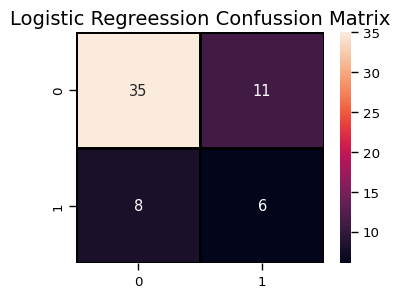

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, yhat), annot= True, fmt = 'd', linecolor='k', linewidth=1)

plt.title('Logistic Regreession Confussion Matrix', fontsize= 14)
plt.show()

* Reporte (por clases y general)

In [64]:
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.35      0.43      0.39        14

    accuracy                           0.68        60
   macro avg       0.58      0.59      0.59        60
weighted avg       0.71      0.68      0.69        60



* Grafiquemos, área bajo la curva ROC vs línea base

In [65]:
from sklearn.metrics import roc_curve

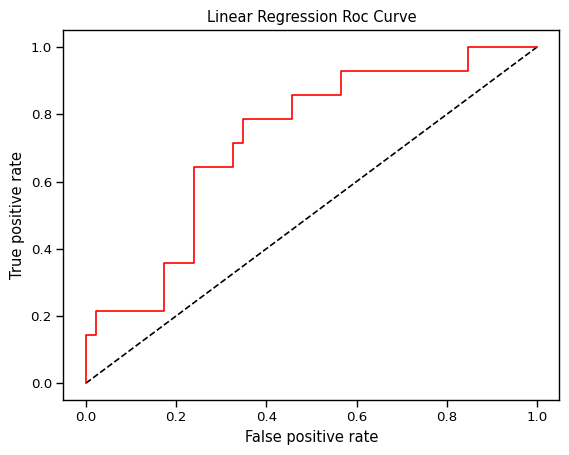

In [68]:
y_rfpred_prob = model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = "Linear Regression", color = 'r')

plt.title("Linear Regression Roc Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.show();

In [ ]:
test_accuracy = np.array(test_accuracy)

In [ ]:
print("Best accuracy is {} with k = {}".format(test_accuracy.max(), test_accuracy.argmax()+1) )

Best accuracy is 0.8 with k = 4


# Comuniquemos resultados

* Probabilidades que asigna Regression logística

In [69]:
yhat_prob = model.predict_proba(X_test)
yhat_prob

array([[0.97714371, 0.02285629],
       [0.98877631, 0.01122369],
       [0.97023356, 0.02976644],
       [0.99061844, 0.00938156],
       [0.97678068, 0.02321932],
       [0.54675181, 0.45324819],
       [0.12155891, 0.87844109],
       [0.5495008 , 0.4504992 ],
       [0.53483684, 0.46516316],
       [0.3509692 , 0.6490308 ],
       [0.58408961, 0.41591039],
       [0.92208678, 0.07791322],
       [0.85529185, 0.14470815],
       [0.95402458, 0.04597542],
       [0.41864754, 0.58135246],
       [0.67703363, 0.32296637],
       [0.4500271 , 0.5499729 ],
       [0.67895903, 0.32104097],
       [0.92532129, 0.07467871],
       [0.6020812 , 0.3979188 ],
       [0.61124682, 0.38875318],
       [0.40612162, 0.59387838],
       [0.67514581, 0.32485419],
       [0.41158709, 0.58841291],
       [0.36058713, 0.63941287],
       [0.81841365, 0.18158635],
       [0.58986571, 0.41013429],
       [0.32674923, 0.67325077],
       [0.21951078, 0.78048922],
       [0.99876796, 0.00123204],
       [0.

* Coeficientes del modelo

Axes(0.125,0.11;0.775x0.77)


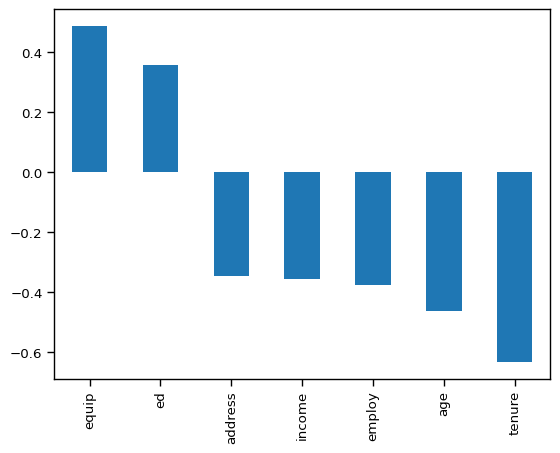

In [70]:
weights = pd.Series(model.coef_[0],
                    index= ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'])

print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

# Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model_rf = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs=1,
                                  random_state = 50, max_leaf_nodes = 30)

In [78]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_jobs=1, oob_score=True,
                       random_state=50)

* Predicciones

In [79]:
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7333333333333333
